# House Sales in King Country, USA

선형 회귀분석을 학습해 봅시다.
선형 회귀분석을 사용하여 집값(price)을 예측해 봅시다.

**어떤 데이터 분석을 하더라도 가장 먼저 변수들을 살펴보고 시작해야 합니다.**

데이터셋에서 추출할 수 있는 변수는 다음과 같습니다.

독립 변수
- id : 고유한 id 값
- date : 집이 매각된 날자
- bedrooms : 침실 수
- bathrooms : 욕실 수
- sqft_living : 집의 평방 피트
- sqft_lot : 부지의 평방 피트
- floors : 집의 총 층수
- waterfront : 물가가 보이는 집
- condition : 상태가 얼마나 좋은지 여부
- grade : 주택에 부여되는 등급
- sqft_above : 지하실을 제외한 집의 평방 피트
- sqft_basement : 지하실의 평방 피트
- yr_built : 지어진 연도
- yr_renovated : 리모델링된 연도
- lat : 위도 좌표
- long : 경도 좌표
- sqft_living15 : 2015년 당시 거실 면적 (일부 개조를 의미하고, 부지 면적에 영향을 미칠 수도 있고 아닐 수도 있음)
- sqft_lot15 : 2015년 당시 부지 면적(일부 개조를 의미함)

종속 변수(y)
- price : 주택 가격

Details
https://info.kingcounty.gov/assessor/esales/Glossary.aspx

In [39]:
import numpy as np
import pandas as pd

# 통계학습을 위한 패키지입니다
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 기계학습을 위한 패키지입니다
import sklearn.linear_model
from sklearn.model_selection import train_test_split

# 시각화를 위한 패키지입니다
from matplotlib import pyplot as plt
import seaborn as sns

# 그래프를 실제로 그리기 위한 설정입니다
%matplotlib inline

# 경고 메시지를 무시합니다
import warnings
warnings.filterwarnings('ignore')

In [40]:
# csv 파일을 불러와서 DataFrame 에 담습니다.
df = pd.read_csv('kc_house_data.csv')

# index 를 1로 시작하도록 수정합니다.
df.index += 1
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


기본적으로 다음 세 가지를 해 주시면 좋습니다.

1. 결측치 확인
2. 각 column(변수)의 data type 학인
3. 기본적인 기술 통계값 확인

In [41]:
# 결측치 확인
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [42]:
# type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

보통 `describe()` 를 통해 기본적인 기술 통계값을 확인할 수 있습니다.<br/>
여기서는 중간값, 결측치, 왜도, 첨도까지 보기 위해 다음과 같이 코드를 작성하겠습니다.

In [43]:
# 중간값, 결측치, 왜도, 첨도를 표시합니다.
df_stats = df.describe().T # 전치시키는 연산. 행과 열의 위치를 바꿔줘요. 

median_results = []
skew_results = []
kurtosis_results = []
null_results = []

for idx, val in enumerate(df_stats.index):
    median_results.append(df[val].median())
    skew_results.append(df[val].skew())
    kurtosis_results.append(df[val].kurtosis())
    null_results.append(df[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats

,count,mean,std,min,25%,50%,75%,max,median,missing,skewness,kurtosis
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09,3.904930e+09,0,0.243329,-1.260542
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06,4.500000e+05,0,4.024069,34.585540
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01,3.000000e+00,0,1.974300,49.063653
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00,2.250000e+00,0,0.511108,1.279902
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04,1.910000e+03,0,1.471555,5.243093
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06,7.618000e+03,0,13.060019,285.077820
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00,1.500000e+00,0,0.616177,-0.484723
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0,11.385108,127.632494
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0,3.395750,10.893022
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,0,1.032805,0.525764


해당 결과값에서 종속 변수(타겟)인 price의 왜도 (skewness)가 4.02로 왼쪽으로 치우쳐 있는 것을 확인할 수 있다.</br>
자연로그를 활용하여 분포를 조정할 필요가 있다.

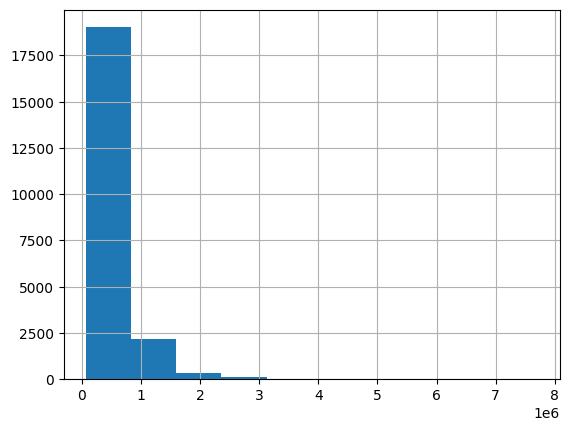

In [44]:
df['price'].hist()
plt.show()

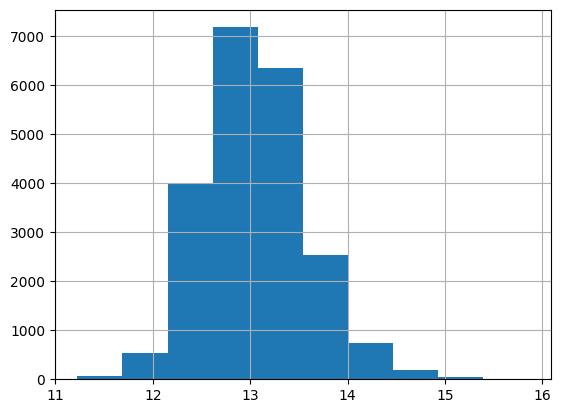

In [45]:
np.log(df['price']).hist()
plt.show()

In [46]:
np.log(df['price']).skew()

np.float64(0.42807247557592526)

자연로그를 취해서 종속 변수(price)의 분포가 정규분포 형태를 띄는 것을 확인할 수 있다.(선형 회귀분석 시 자연로그를 적용할 계획이다.)

다음 함수를 통해 object 타입과 int64, float64 타입을 분류해서 데이터를 살펴보자.</br>
df_obj.head() 함수를 통해서 확인해보면 date의 전처리가 필요한 것을 알 수 있다.

In [47]:
def separate_dtype(DataFrame:df):
    df_obj = df.select_dtypes(include=['object'])
    df_numr = df.select_dtypes(include=['int64','float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df)

In [48]:
df_numr.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
3,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [49]:
df_obj.head()

,date
1,20141013T000000
2,20141209T000000
3,20150225T000000
4,20141209T000000
5,20150218T000000


date column을 앞에서 4자리만 추출하고 type을 int64로 변경하고 column명을 date2로 저장하자.

In [50]:
df_obj['date2'] = df_obj['date'].apply(lambda x: x[0:4])
df['date2'] = df_obj['date2'].astype('int64')
df['date2']

1        2014
2        2014
3        2015
4        2014
5        2015
         ... 
21609    2014
21610    2015
21611    2014
21612    2015
21613    2014
Name: date2, Length: 21613, dtype: int64

date2(집이 매각된 연도)와 yr_built(집이 지어진 연도)의 기간 차이를 비교해서 sold-built_years 라는 새로운 변수를 추가하자.

In [51]:
df['sold-built_years'] = df.apply(lambda x:((x['date2']) - (x['yr_built'])), axis=1)
df['sold-built_years']

1        59
2        63
3        82
4        49
5        28
         ..
21609     5
21610     1
21611     5
21612    11
21613     6
Name: sold-built_years, Length: 21613, dtype: int64

지금까지 데이터의 전체적인 파악 및 전처리를 했다.</br>
이제 시작화를 통해 데이터의 특징을 살펴보자.

히스토그램을 통해 각각의 독립 변수 데이터의 분포를 확인할 수 있다.

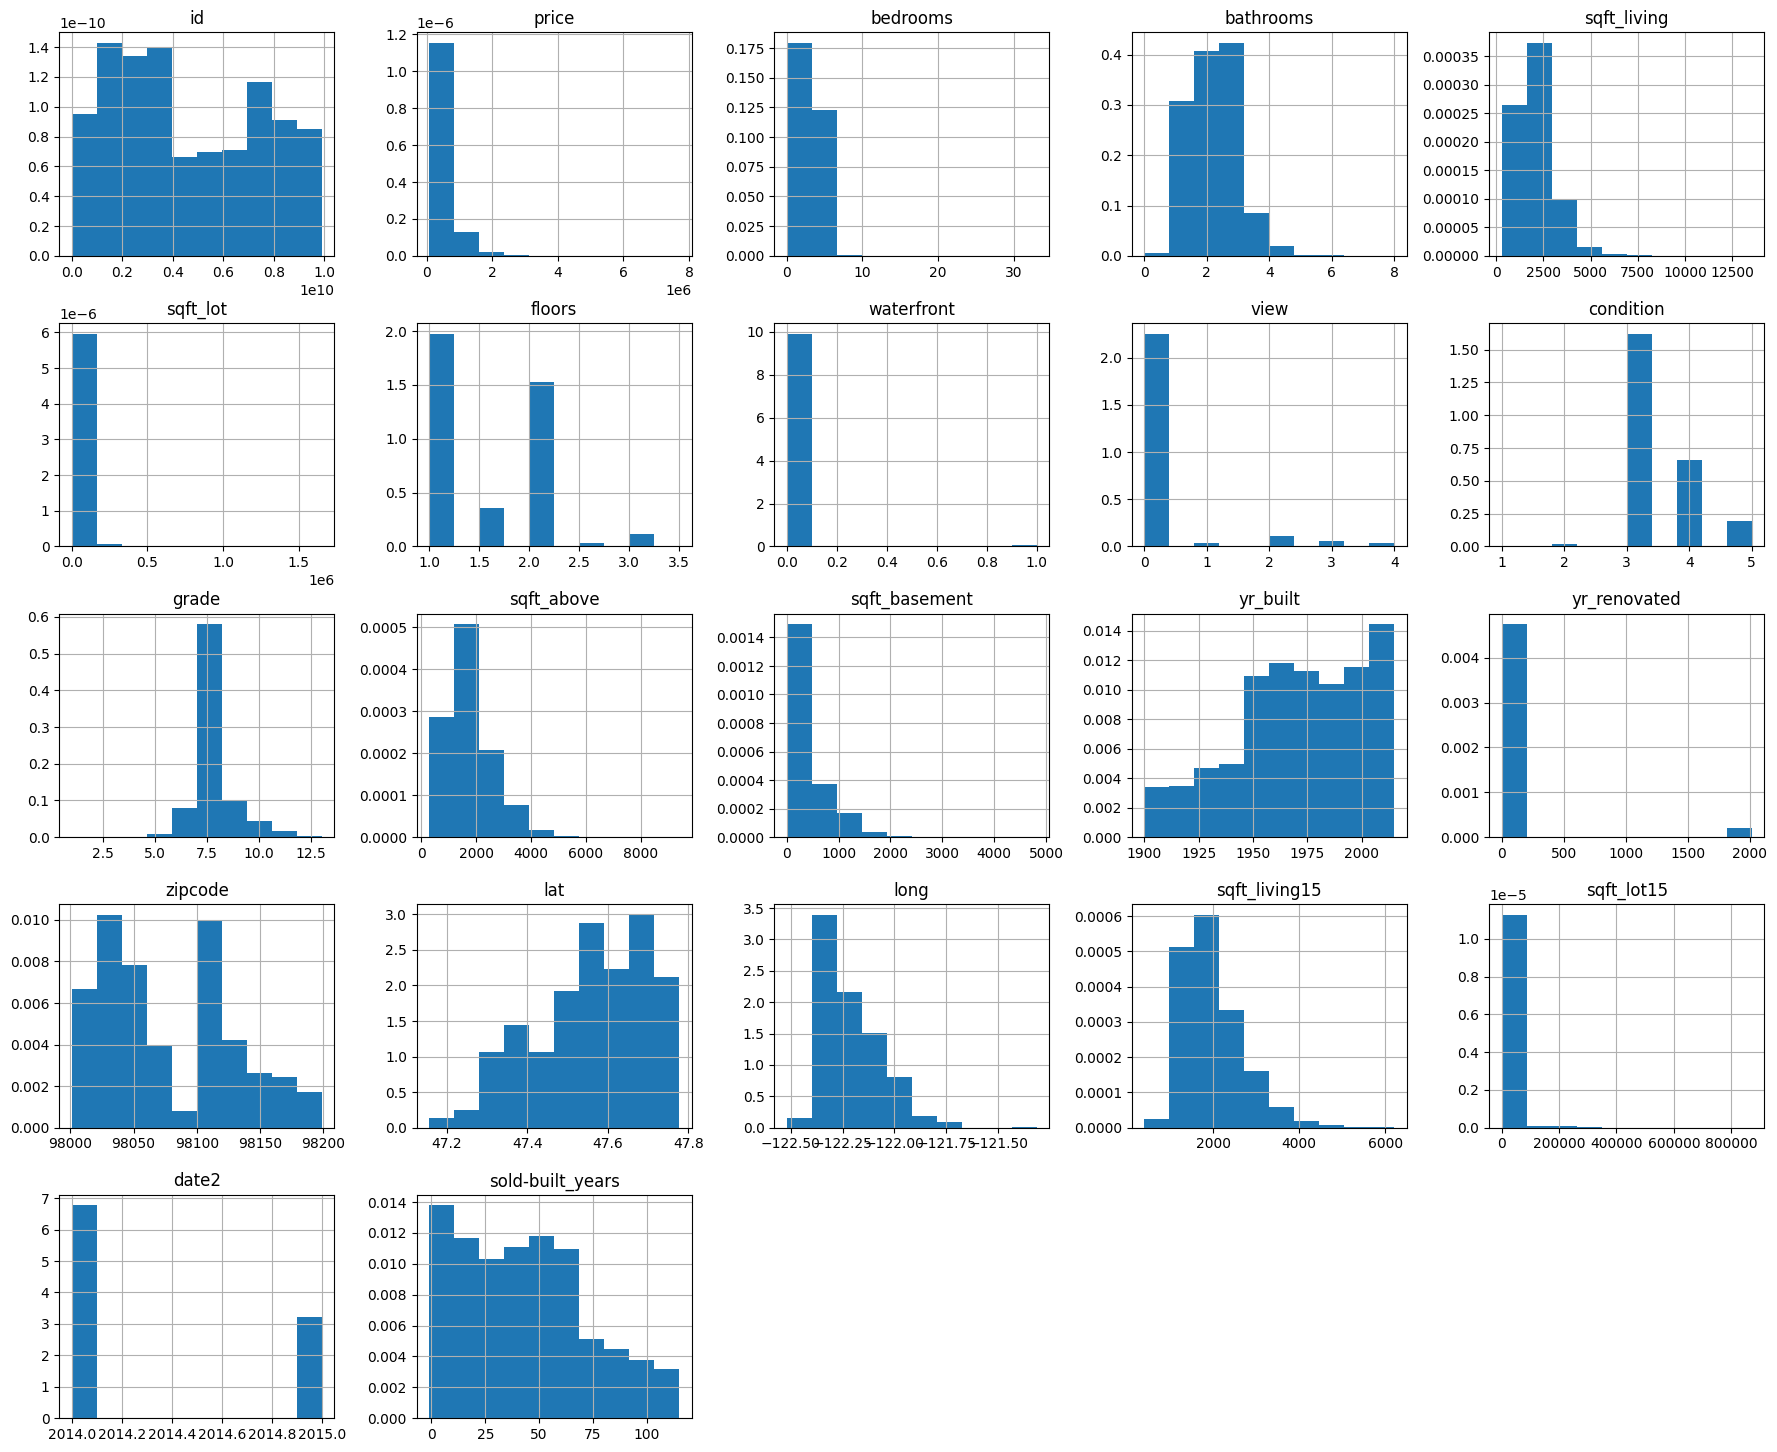

In [52]:
df.hist(figsize=(22,18), density=True)
plt.show()

종속 변수(price)와 선형 관계가 있을 것 같은 독립 변수들을 선정하여 산점도(Scatter plot) 그래프를 그려보자.

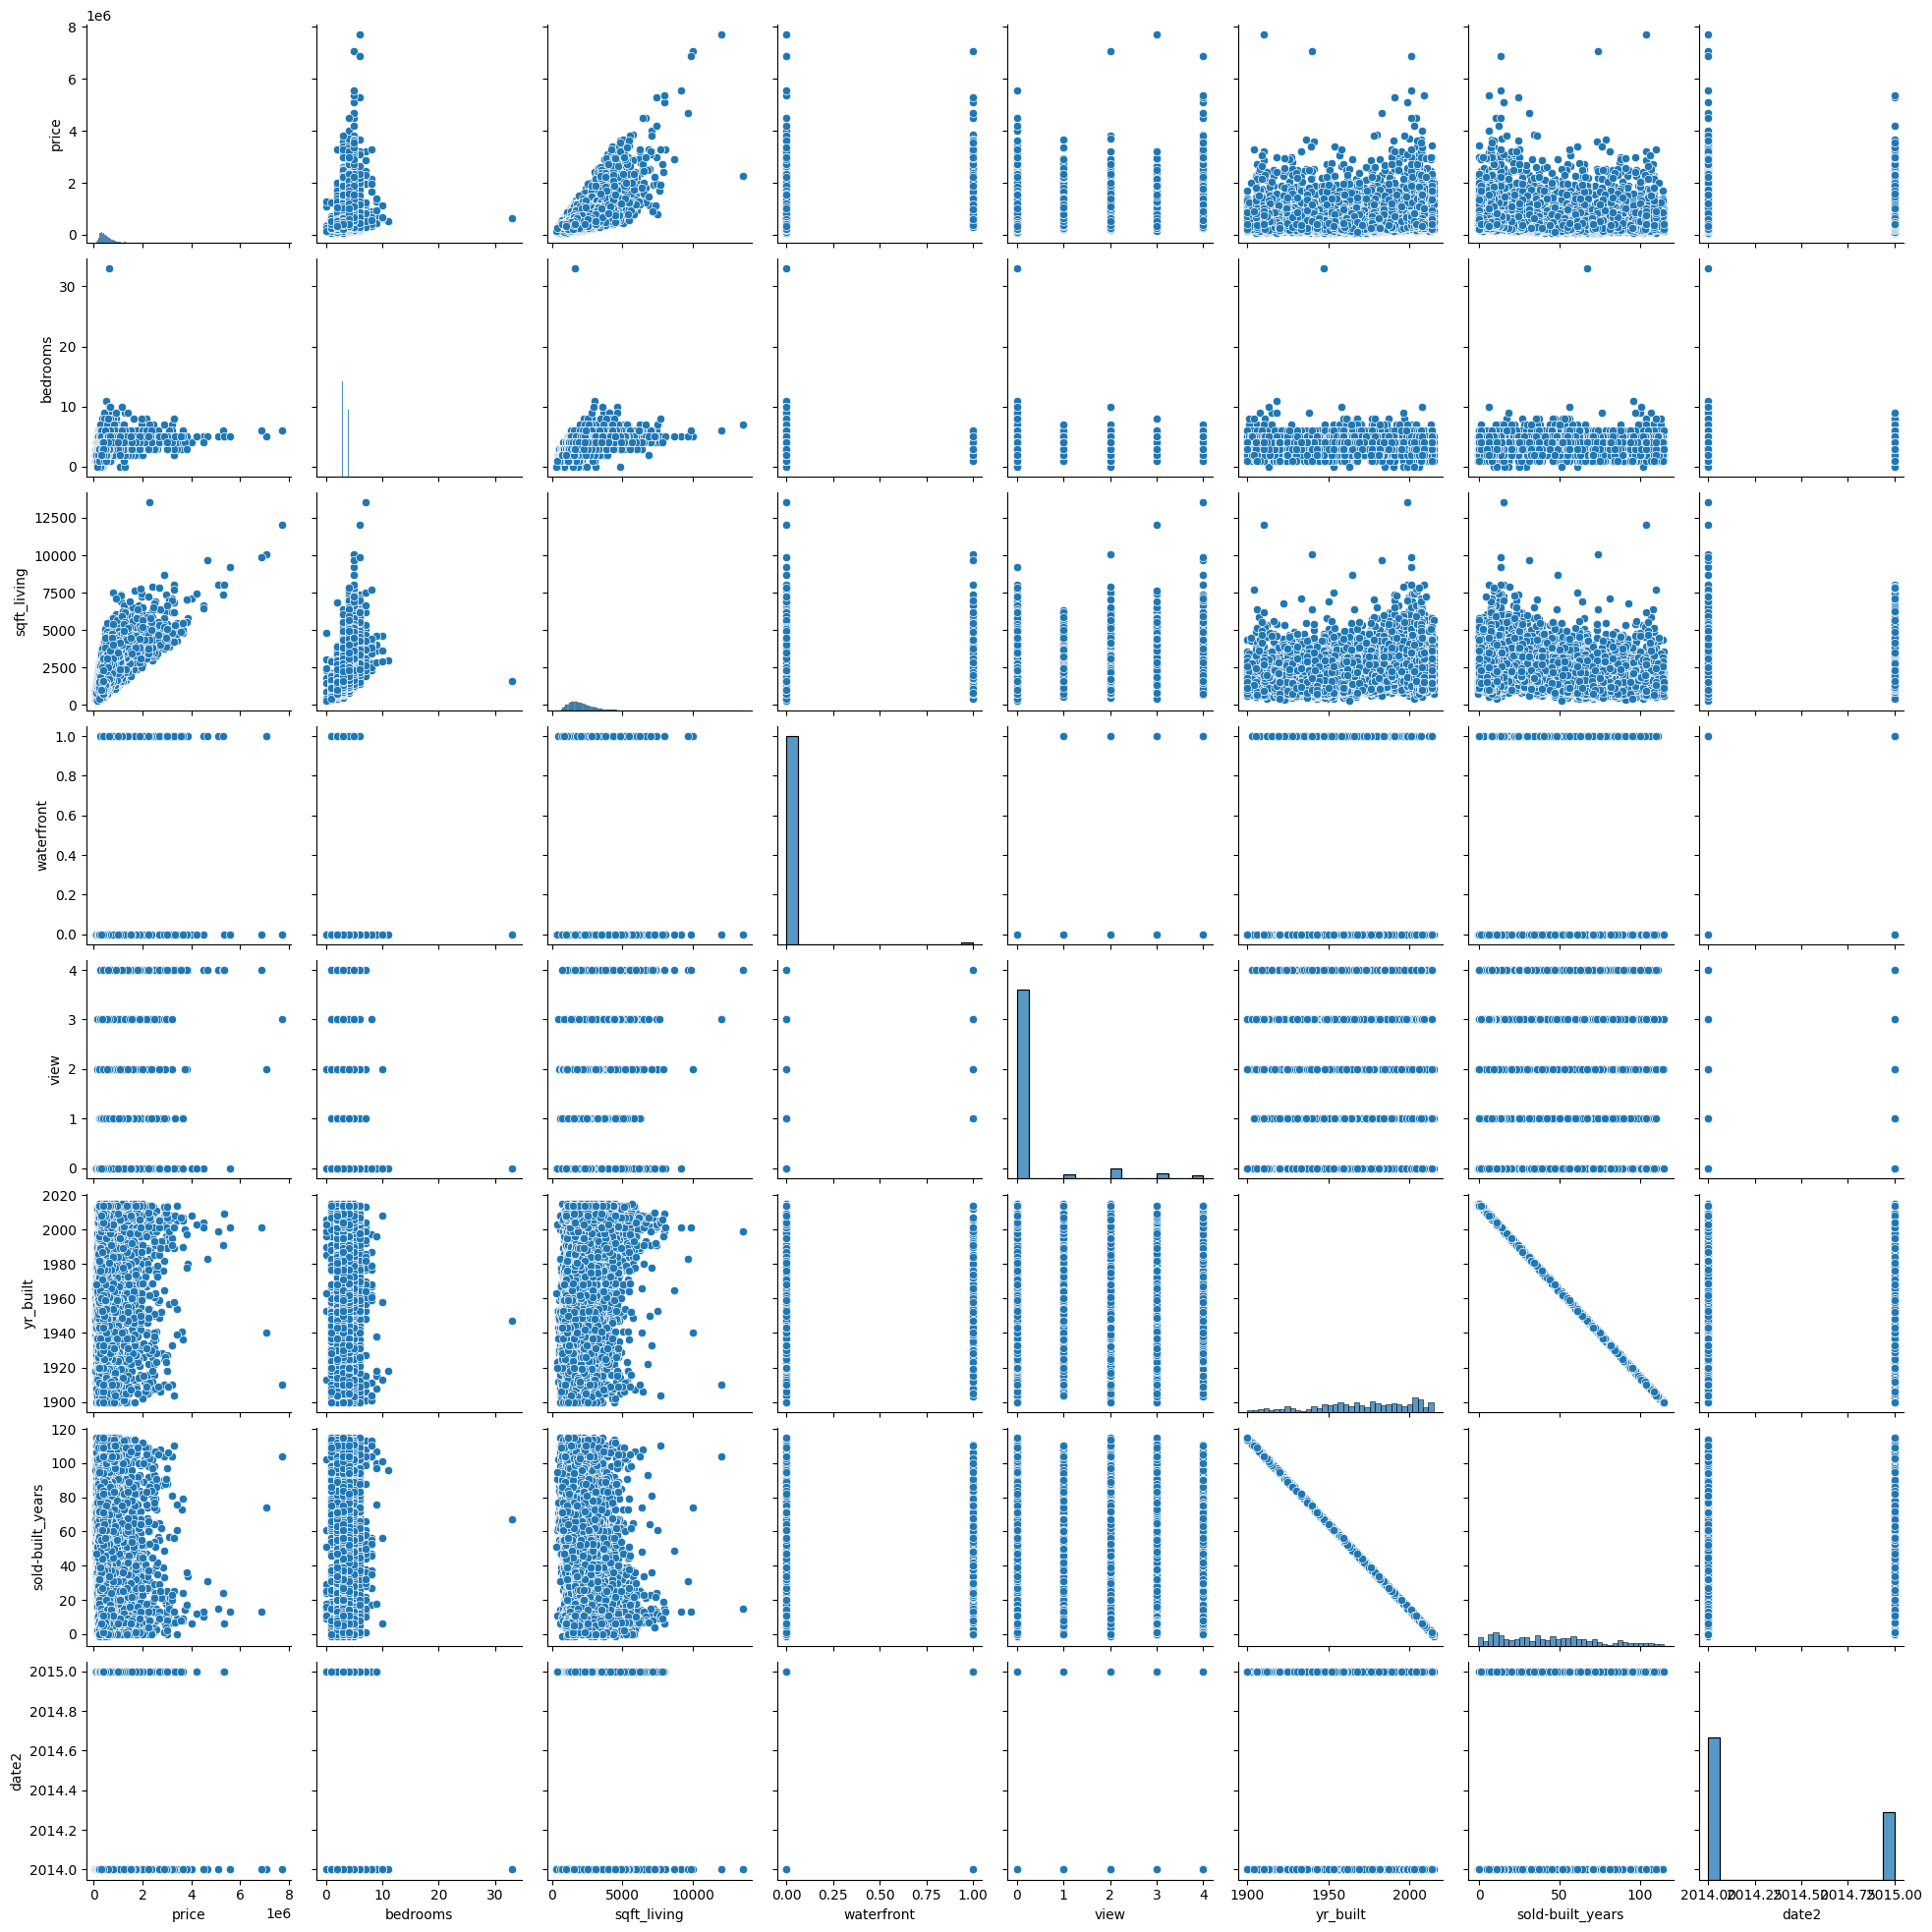

In [53]:
# 변수 선정
columns = ['price','bedrooms','sqft_living','waterfront','view','yr_built','sold-built_years','date2']


df_pairplot = df[columns]
sns.pairplot(df_pairplot)
plt.show()

산점도를 통해서 종속 변수(price)와 독립 변수들 사이의 선형 관계를 대략적으로 파악할 수 있다.</br>
특히, 다른 변수들과는 달리 price와 sqft_living 간의 선형 관계를 볼 수 있다.

히트맵(Heatmap)을 통해 종속 변수(price)와 상관관계가 높은 독립 변수들은 무엇인지 확인해보자.

또한, 독립 변수들 간에 상관관계가 높은 것들은 어떤 것인지 살펴본다.

In [54]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date2,sold-built_years
1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59
2,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63
3,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82
4,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
5,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21610,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,1
21611,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,5
21612,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,11


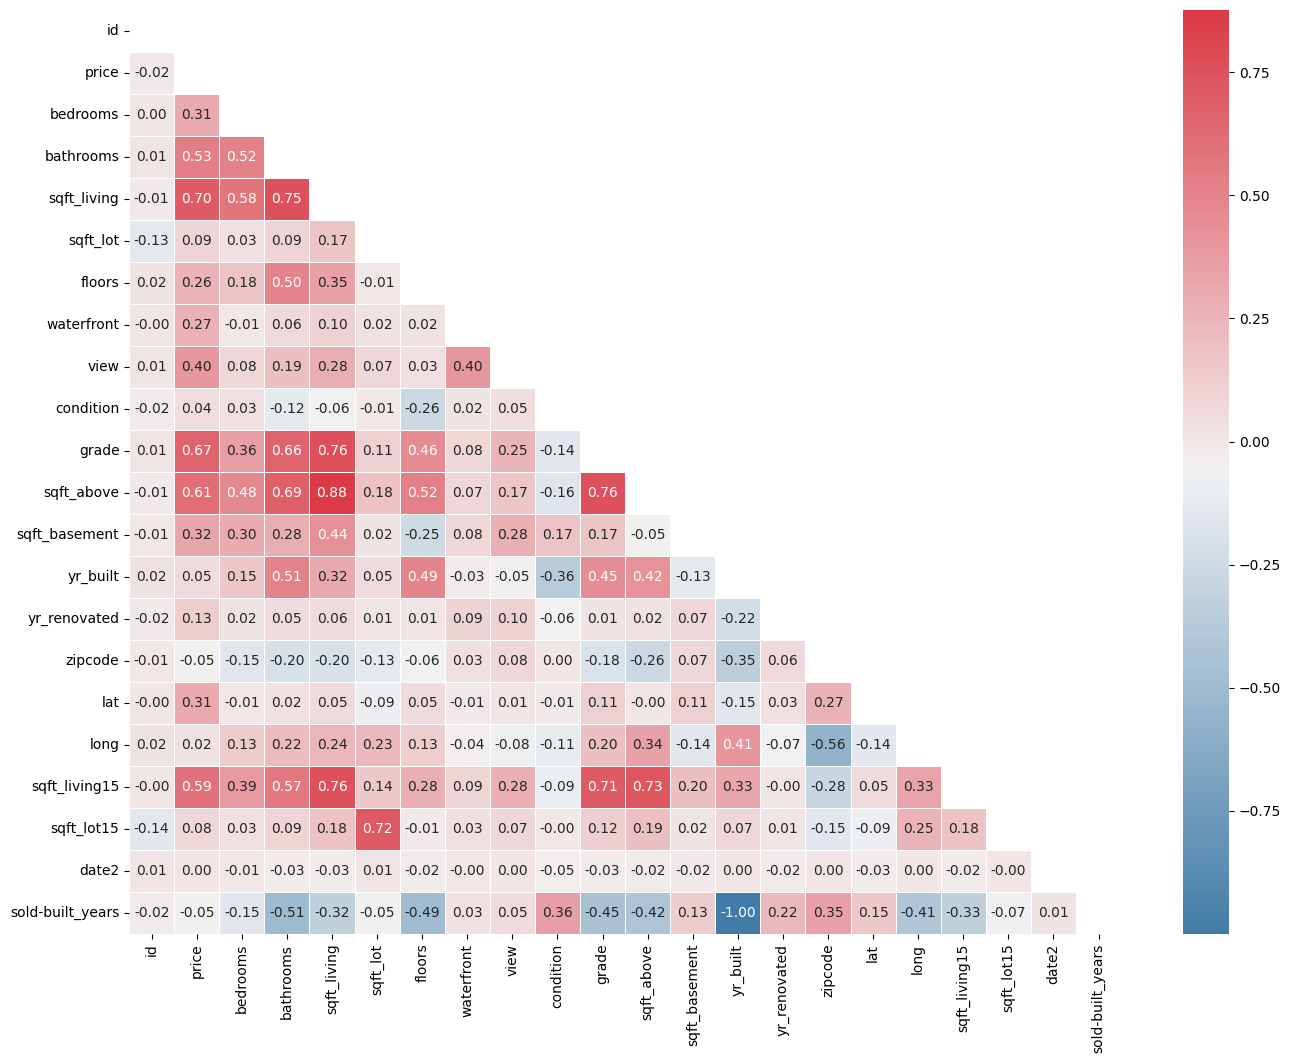

In [55]:
# 반대쪽 삼각형은 안 보이게 설정합니다.
# fmt -> 실제 값 표시, .2f -> 소수점 둘째 자리까지 표현

df_corr = df.drop(columns=['date']).corr()
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(16,12))

sns.heatmap(df_corr, annot=True, mask=mask, cmap=cmap, linewidths=.5, fmt='.2f', annot_kws={"size":10})
plt.show()

price와 상관관계가 높은 변수들만 추려서 확인합니다. </br>
정렬을 이용하면 편리합니다.

In [56]:
df_corr.sort_values(by='price', ascending=False)[['price']]

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


독립 변수들 간의 상관관계를 확인해본 결과 </br>
`sqft_living`, `sqft_above`, `sqft_living15`
세 변수들이 상관관계가 높게 나왔다.

세 변수들의 데이터 분포를 살펴보자.

*grade의 경우 최종 결정되는 '등급' 값이라 등급으로 가격을 예측하는 것은 무의미하다고 판단*

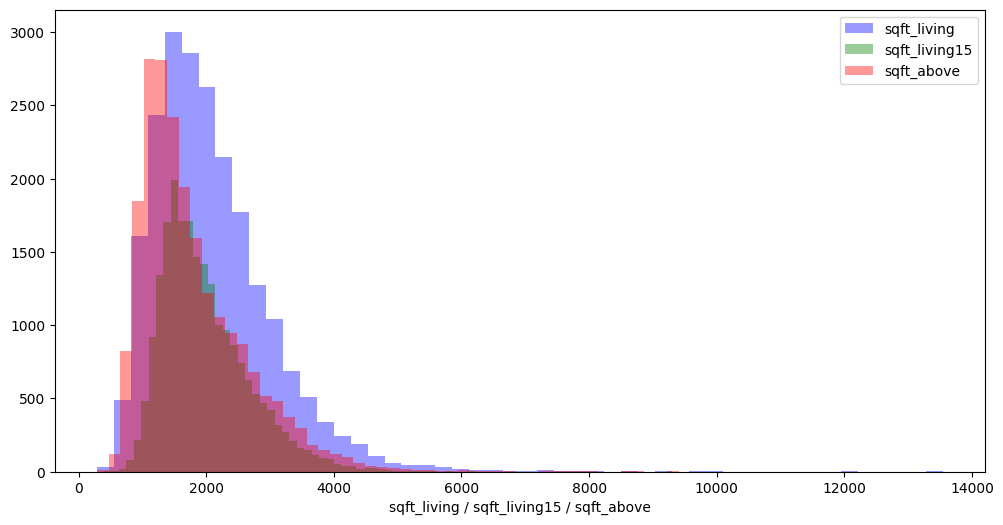

In [57]:
# column 선택
columns = ['sqft_living', 'sqft_living15', 'sqft_above']
colors = ['blue','green','red']

living = df[columns]

# 한 번에 보기
plt.figure(figsize=(12,6))

for i in range(3):
    ax = sns.distplot(df[columns[i]], hist=True, norm_hist=False, kde=False, label=columns[i], color=colors[i])
ax.set(xlabel="sqft_living / sqft_living15 / sqft_above")

plt.legend()
plt.show()

그림에서 볼 수 있듯이 세 변수들의 분포가 비슷하다는 것을 알 수 있습니다.</br>
따라서 다중공선성이 존재할 경우 이 중 price와 상관관계가 가장 높은 sqft_living 으로 분석합니다.

설명 변수(X) 1개, 반응 변수(y) 1개일 때 사용하는 대표적인 방법론으로 단순 선형 회귀분석이 있습니다.</br>
종속 변수(price)와 가장 상관관계가 높은 sqft_living 변수를 독립 변수로 단순 선형 회귀 분석을 실시합니다.

설명 변수(X)를 sqft_living으로 하고 반응 변수(y)로 price를 했을 때 두 변수 간의 선형관계를 확인해보자.

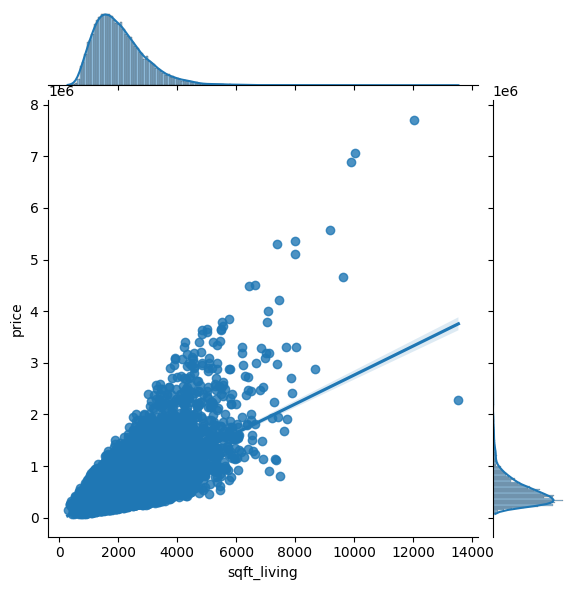

In [58]:
sns.jointplot(x='sqft_living', y='price', data=df, kind='reg')
plt.show()

회귀분석을 할 때는 항상 상수항을 추가해야 합니다.</br>
add_constant 함수를 사용해서 상수항을 추가해 봅시다.

In [59]:
X = df[['sqft_living']]
y = df[['price']]

# 상수항을 추가합니다
X = sm.add_constant(X, has_constant="add")
X.head()

,const,sqft_living
1,1.0,1180
2,1.0,2570
3,1.0,770
4,1.0,1960
5,1.0,1680


fit() 함수를 통해 선형 모델에 적합시켜봅시다.

해당 결과를 result_model에 저장하고 summary() 함수를 통해서 결과를 확인합니다.

In [60]:
# 모델 fit
model = sm.OLS(y, X)
result_model = model.fit()
result_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:48:05   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

주요 항목별 세부 내용은 다음과 같습니다.

- Dep. Variable : 종속 변수, 타겟값.
- Model : 학습 모델 / OLS(Ordinary Least Squares), 잔차 제곱합(손실)을 최소로 하는 파라미터를 선택하는 방법
- Method : Least Squares / 잔차 제곱합(손실)을 최소로 하는 파라미터를 선택하는 방법
- No. Observation : 데이터셋 크기
- Df Residuals : 데이터셋 크기 - 추정된 파라미터 수를 뺀 것
- Df Model : 독립 변수의 숫자
- Covariance Type : 공분산 종류(default: nonrobust)
- R-squared : 결정계수, 모델의 설명력(0~1 사이 값), 1에 가까울수록 모델의 설명력이 높음
- Adj. R-squared : 조정된 결정계수, 조정된 모델의 설명력
- Std. error : 계수의 표준 오차
- F-statistic : F value
- Prob (F-statistic): p-value
- Log-Likelihood : 최대 로그 우도
- 아카이케 정보 기준(Akaike's Information Criterion; AIC) : 모델의 성능지표로 작을수록 좋은 모델
- Coef : 계수값
- P>|t| : p-value

P>|t|(p-value) 항목의 유의 확률이 유의 수준 0.05보다 훨씬 작아 유의 수준 0.05 이하에서 귀무 가설은 기각됩니다.

즉, 모형 통계학적 유의성이 확보됩니다.

시각화를 통해 실제 타겟값과 모델을 통해 추정한 값, 잔차(residual)를 확인해 봅시다.

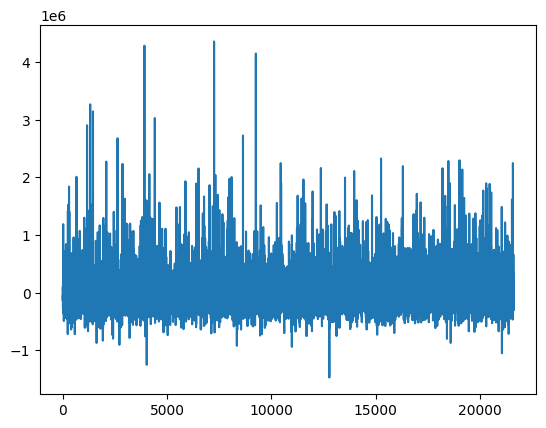

In [61]:
# 잔차를 확인합니다
result_model.resid.plot()
plt.show()

# 다중 선형 회귀


앞에서는 단순히 변수 하나만 가지고 단순 선형 회귀 모형을 돌렸습니다.

다중 선형 회귀 모형은 단순 선형 회귀모형의 확장으로, 연속형 반응변수 하나에 "설명 변수가 둘 이상"인 모형을 말합니다.
설명 변수가 늘어나므로 추가 검토해야 할 문제는 설명 변수 정보 중첩으로 발생하는 다중공선성(multicollinearlity) 문제와,
너무 많은 설명 변수를 포함해 발생하는 차원의 저주 문제 등이 있습니다.

이번에는 범주형 변수를 설명 변수로 포함한 회귀모형에 대해서도 논의할 것입니다.

id를 제외한 모든 독립 변수를 사용해서 다중 선형 회귀분석을 합니다.

그 후 선별한 독립 변수들로 다시 다중 선형 회귀분석을 해 봅시다.

>원래 뭐든 다 때려보고, 그 중 괜찮은 걸 고르는 것이 가장 속이 편합니다.

In [62]:
# date의 경우 전처리를 한 column이 존재하기 때문에 제외
columns = list(df.columns)
not_used = ['id','date']

for item in not_used:
    columns.remove(item)
columns


['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date2',
 'sold-built_years']

In [63]:
# 위의 columns 만 선택한 df 선언
df_reg = df[columns]

# constant 더하고 feature columns 뽑아내기
df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

# 변수 선택
X = df_kc_reg[feature_columns]
y = df_kc_reg.price

# 회귀 모형
multi_linear_model = sm.OLS(y, X)
result_model_1 = multi_linear_model.fit()

# 결과
result_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2816.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:48:08   Log-Likelihood:            -2.9455e+05
No. Observations:               21613   AIC:                         5.891e+05
Df Residuals:                   21594   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bathrooms         4.125e+04   3245.693     12.710      0.000    3.49e+04    4.76e+04
bedrooms         -3.598e+04   1887.302    -19.064      0.000   -3.97e+04   -3.23e+04
condition         2.767e+04   2348.964     11.781      0.000    2.31e+04    3.23e+04
const             -5.46e+07   6.59e+06     -8.282      0.000   -6.75e+07   -4.17e+07
date2             1.938e+04   1952.650      9.926      0.000    1.56e+04    2.32e+04
floors            7322.7479   3587.535      2.041      0.041     290.915    1.44e+04
grade              9.61e+04   2147.594     44.750      0.000    9.19e+04       1e+05
lat               6.053e+05   1.07e+04     56.511      0.000    5.84e+05    6.26e+05
long             -2.147e+05   1.31e+04    -16.387      0.000    -2.4e+05   -1.89e+05
sold-built_years    1.1e+04    976.501     11.265      0.000    9086.329    1.29e+04
sqft_above          70.7652      2.248     31.481      0.000      66.359      75.171
sqft_basement       39.8445      2.640     15.092      0.000      34.670      45.019
sqft_living        110.6166      2.264     48.857      0.000     106.179     115.054
sqft_living15       21.7694      3.439      6.330      0.000      15.028      28.511
sqft_lot             0.1249      0.048      2.612      0.009       0.031       0.219
sqft_lot15          -0.3794      0.073     -5.191      0.000      -0.523      -0.236
view              5.251e+04   2135.068     24.596      0.000    4.83e+04    5.67e+04
waterfront        5.837e+05   1.73e+04     33.705      0.000     5.5e+05    6.18e+05
yr_built          8381.0840    977.490      8.574      0.000    6465.131    1.03e+04
yr_renovated        20.7777      3.648      5.696      0.000      13.628      27.928
zipcode           -582.8028     32.905    -17.712      0.000    -647.298    -518.307
==============================================================================
Omnibus:                    18432.447   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1903378.131
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.414   Cond. No.                     6.46e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.24e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

결과를 보면 모든 독립 변수들의 p>|t| (p-value) 유의 확률이 유의 수준 0.05보다 훨씬 작아 모형 통계학적 유의성이 확인된다.</br>
R-squared 값이 0.701 로써 약 70%가 모형에 의해 설명된다는 것을 의미한다.

단순 선형 회귀와 달리 다중 선형 회귀분석에서는 모든 변수의 경우 **다중공선성(multicollinearlity)** 문제를 확인해야 한다.

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])], 2)

df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
10,inf,sqft_above
11,inf,sqft_basement
19,inf,date2
12,inf,yr_built
20,inf,sold-built_years
3,inf,sqft_living
14,4922845.94,zipcode
16,1388182.32,long
15,159610.79,lat
9,162.17,grade


설명 변수가 다수이기 때문에 모형에 포함된 설명 변수의 정보가 중첩(상관관계를 가짐)으로,

**다중공선성 문제가 발생하는 것을 확인할 수 있다.**

다음 독립 변수들을 선택해서 다중 선형 회귀분석을 실시해보자.

또한, 반응 변수(price)에 자연로그를 취해 비대칭인 데이터의 분포를 완화한 상태에서 회귀분석을 한다.

- bedrooms(연속형)
- sqrt_living(연속형)
- waterfront(범주형)
- view(범주형)
- sold-built_years : date - yr_built (연속형)

In [65]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 1 to 21613
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21613 non-null  float64
 1   bedrooms          21613 non-null  int64  
 2   bathrooms         21613 non-null  float64
 3   sqft_living       21613 non-null  int64  
 4   sqft_lot          21613 non-null  int64  
 5   floors            21613 non-null  float64
 6   waterfront        21613 non-null  int64  
 7   view              21613 non-null  int64  
 8   condition         21613 non-null  int64  
 9   grade             21613 non-null  int64  
 10  sqft_above        21613 non-null  int64  
 11  sqft_basement     21613 non-null  int64  
 12  yr_built          21613 non-null  int64  
 13  yr_renovated      21613 non-null  int64  
 14  zipcode           21613 non-null  int64  
 15  lat               21613 non-null  float64
 16  long              21613 non-null  float6

In [66]:
df_reg = df[['bedrooms','sqft_living','waterfront','view','sold-built_years','price']]

df_kc_reg = sm.add_constant(df_reg, has_constant='add')
feature_columns = list(df_kc_reg.columns.difference(['price']))

X = df_kc_reg[feature_columns]
y = np.log(df_kc_reg.price)

# 회귀 모형
multi_linear_model = sm.OLS(y, X)
result_model_2 = multi_linear_model.fit()
result_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     4852.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        22:48:15   Log-Likelihood:                -8675.5
No. Observations:               21613   AIC:                         1.736e+04
Df Residuals:                   21607   BIC:                         1.741e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
bedrooms            -0.0413      0.003    -12.647      0.000      -0.048      -0.035
const               12.1722      0.011   1128.098      0.000      12.151      12.193
sold-built_years     0.0025   8.96e-05     27.564      0.000       0.002       0.003
sqft_living          0.0004   3.62e-06    117.929      0.000       0.000       0.000
view                 0.0785      0.004     21.269      0.000       0.071       0.086
waterfront           0.2885      0.031      9.285      0.000       0.228       0.349
==============================================================================
Omnibus:                      190.066   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.753
Skew:                          -0.183   Prob(JB):                     1.41e-47
Kurtosis:                       3.325   Cond. No.                     2.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결과를 보면 모든 독립 변수들의 P >|t| (p-value) 유의 확률이 유의 수준 0.05보다 훨씬 작아 모형 통계학적 유의성이 확인된다.

이제 다중공선성을 살펴보자.

In [67]:
df_vif = pd.DataFrame()
df_vif["VIF"] = np.round([variance_inflation_factor(df_reg.values, i) for i in range(df_reg.shape[1])], 2)

df_vif["features"] = df_reg.columns
df_vif.sort_values(by='VIF', ascending=False)

,VIF,features
1,19.32,sqft_living
0,14.17,bedrooms
5,7.56,price
4,2.85,sold-built_years
3,1.48,view
2,1.24,waterfront


다중공선성 문제가 확실히 줄어들었음을 알 수 있다.

# 회귀모형의 가정 진단

회귀모형은 반응 변수와 설명 변수의 선형 관계를 전제로 한다.</br>
또한 오차에 대한 독립성, 정규성, 등분산성 가정을 전제로 한다.

앞서 확인한 모형의 유의성과 계수의 유의성이 확보되었다고 해도, **오차에 대한 가정을 만족하지 않으면** 다른 대안을 찾아야 한다.

## 선형성 검정

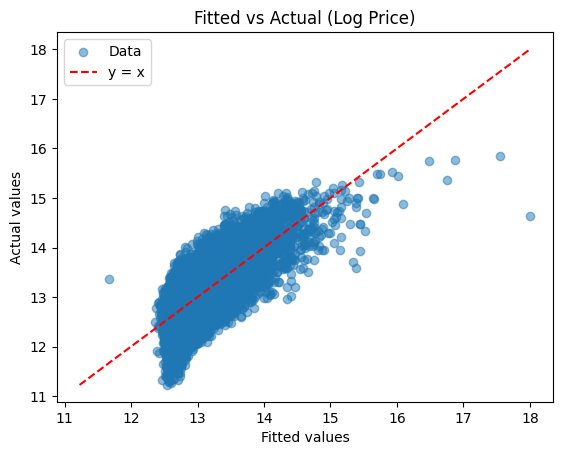

In [68]:
import matplotlib.pyplot as plt

fitted = result_model_2.fittedvalues

plt.scatter(fitted, y, alpha=0.5, label='Data')

# 대각선 추가
min_val = min(fitted.min(), y.min())
max_val = max(fitted.max(), y.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')

plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Fitted vs Actual (Log Price)')
plt.legend()
plt.show()


우상향하는 모습을 보이고, 데이터가 어느정도 대각선을 따라간다. <br>
데이터가 심하게 곡선으로 휘는 형태는 보이지 않으니까 선형성을 만족한다고 할 수 있다. 

## 정규성 검정

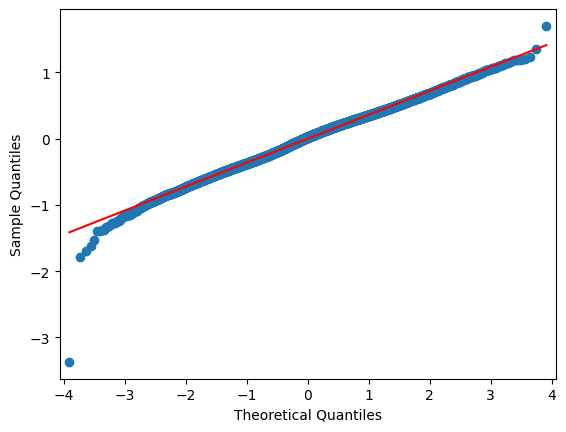

In [69]:
# 1. 정규성 검정

# Q-Q 도표
qqplot = sm.qqplot(result_model_2.resid, line="s")
plt.show() 

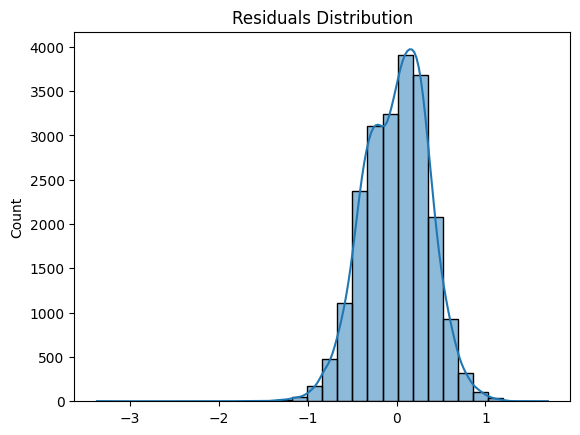

In [70]:
# 잔차의 분포
resid = result_model_2.resid
sns.histplot(resid, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.show()

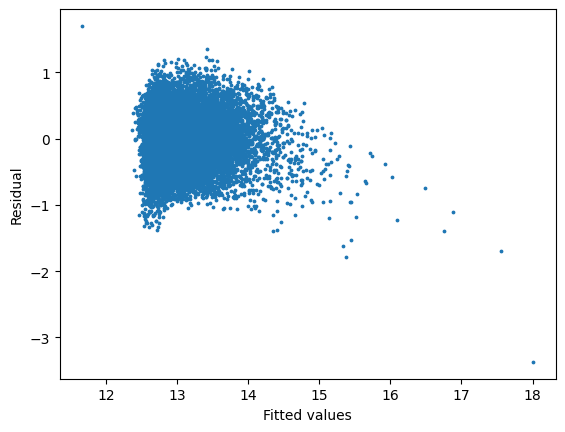

In [71]:
# 잔차 패턴 확인
fitted = result_model_2.predict()

resid = result_model_2.resid
pred = result_model_2.predict(X)

fig = plt.scatter(pred, resid, s=3)

plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

In [72]:
# 샤피로 - 월크 검정
result_shapiro = stats.shapiro(result_model_2.resid)

print(f"F value : {result_shapiro[0]:.4f} / p-value : {result_shapiro[1]:.4f}")

if result_shapiro[1] < 0.05:
    print("p-value < 0.05 입니다.")

F value : 0.9959 / p-value : 0.0000
p-value < 0.05 입니다.


In [73]:
# 관측치 개수 확인
print(f"관측치는: {len(result_model_2.resid)}")

관측치는: 21613


H0 귀무가설: 데이터가 정규분포를 따른다<br>
H1 대립가설: 데이터가 정규분포를 따르지 않는다. <br>

샤피로-윌크 검정에서는 p-value < 0.05인데<br>
이러면 귀무가설을 기각해서 '데이터가 정규분포를 따르지 않는다'가 결론이 돼야 하지 않나요??<br>

네! 잘 찾아냈어요~~~ <br>
샤피로-윌크 검정에서 p-value가 0.05보다 작으면 통계적으로는 정규성을 만족하지 않아요. <br>
그런데, 이 경우는 관측치의 개수가 21613개죠. <br>
이처럼 데이터가 많은 경우는 p-value 하나만 보고 정규성을 만족하지 않는다고 하기보다는 Q-Q 플롯을 같이 보면서 판단해야 해요. <br>
위에서 봤을 때, Q-Q 플롯이 직선과 대체로 일치했죠! <BR>
그래서 이 경우는 정규성을 만족한다고 할 수 있어요. 

## 독립성 검정
위에서 다중공선성 확인했으니 패스할게요~~

## 오차항의 자기상관 검정

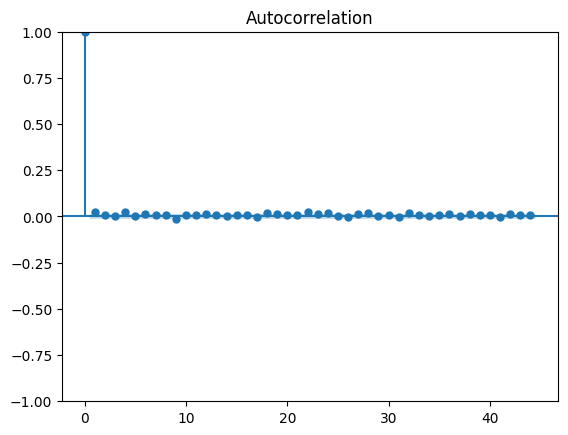

In [74]:
# ACF (Auto-Correlation Function)
sm.graphics.tsa.plot_acf(result_model_2.resid)
plt.show()

In [75]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(result_model_2.resid)
print(f'Durbin-Watson stat: {dw_stat:.3f}')


Durbin-Watson stat: 1.956


ACF와 Durbin-Watson을 이용해 독립성 만족 여부를 확인할 수 있다.<BR>
Durbin-Watson이 2에 가까우면 자기상관이 없다 -> 오차항은 자기상관 되어있지 않다

## 등분산성

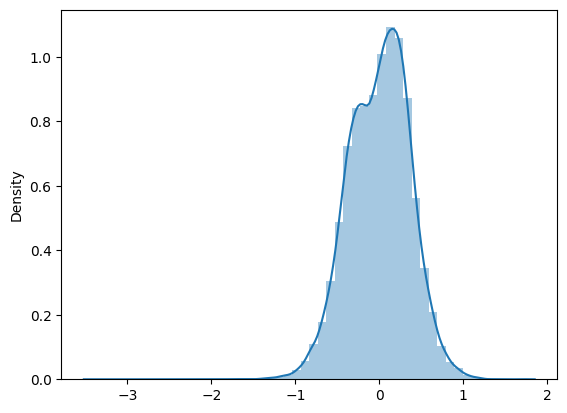

In [76]:
sns.distplot(result_model_2.resid)
plt.show()

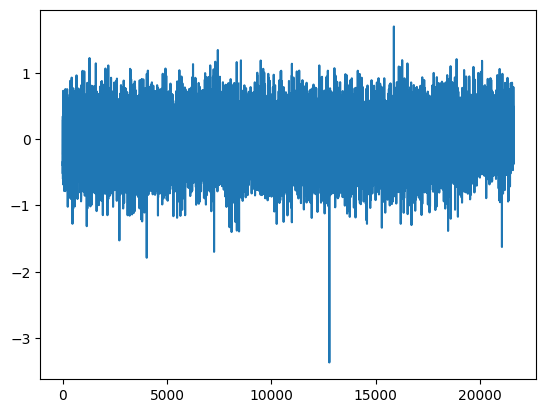

In [77]:
result_model_2.resid.plot()
plt.show()

잔차가 비교적 일정한 폭 내에 고르게 분포되어 있다. (-1~1 사이에 대부분이 몰려있다)<BR>
따라서 잔차 그래프를 통해서 오차의 등분산성 가정을 만족하는 것을 확인할 수 있다.

## 오차항의 평균이 0인가?

In [78]:
print(np.mean(result_model_2.resid))

6.250280150731129e-12


e-12는 엄청나게 작은 숫자니까, 7에 이것을 곱한 것은 0에 가깝다고 볼 수 있다.

**기본가정 6가지를 다 만족하니까 'bedrooms','sqft_living','waterfront','view','sold-built_years','price'를 독립변수 X로 해서 만든 모델은 y를 예측하기에 적합하다.**<br>
(대신 다중공선성을 조금 더 낮출 수 있으면 더 좋겠죠~~)